<a href="https://colab.research.google.com/github/mkorlyakova/MSTU-courses/blob/main/ML%20magister/14/ML_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 6**
## Cверточные нейронные сети

Для обучения нейросети будем использовать датасет cifar-10. В нем 10 категорий объектов, например - лошадь, лягушка, корабль. Данный датасет уже более сложен для нейронных сетей чем mnist, однако он намного проще датасетов наподобие imagenet где используются сотни классов и архитектуры нейронных сетей для подобных датасетов также понадобяться более сложные.

In [1]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow.keras as keras
import tensorflow.nn as nn

import os
import matplotlib.pyplot as plt
import numpy as np

Данные CIFAR10: 10 классов, 50000 примеров для тренировки, 10000 примеров тестов. каждый пример цветное изображение 32х32 пикселя

In [2]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:


# установка параметров нейросети
batch_size = 32 # размер пакета
num_classes = 10 # число классов
epochs = 5 # число эпох для обучения
 
num_predictions = 20 #  число предсказаний
save_dir = os.path.join(os.getcwd(), 'saved_models') #  путь для сохранения модели
model_name = 'keras_cifar10_trained_model.h5' # имя модели

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# перейдем к диапазону 0,1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170498071/170498071 [==============================] - 8s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [4]:
data_augmentation = False

Пример объекта из множества CIFAR10

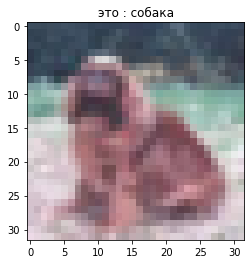

In [ ]:
N = 101

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

Сборка модели как Sequential:

In [22]:

# конфигурирование слоев нейросети
model = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout( 0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])


Сборка модели в функциональном стиле:

In [23]:

# конфигурирование слоев нейросети
x = Input(shape = tuple(x_train.shape[1:]))
x_in = x 

# слои нейросети отвественные за свертку и max-pooling
x = Conv2D(32, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(32, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout( 0.25)(x)

x = Conv2D(64, (3, 3), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(32, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout( 0.25)(x)

# полносвязные слои нейронной сети
x = Flatten()(x)
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dropout( 0.25)(x)
x_out = Dense(num_classes)(x)
x_out = Activation('softmax')(x_out)

model_func = keras.models.Model(x_in,x_out) # сборка модели в функциональном стиле
# инициализация RMSprop optimizer
#opt = tensorflow.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model_func.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Сборка модели в стиле ООП:

In [20]:
# класс блок , который часто встречается: свертка-свертка-пуллинг
class NetBlock(keras.layers.Layer):
    def __init__(self):
        super(NetBlock, self).__init__()
        self.linear_1 = Conv2D(32, (3, 3), padding='same')
        self.linear_2 = Conv2D(32, (3, 3))
        self.nonlinear_3 = MaxPooling2D(pool_size=(2, 2))

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = nn.relu(x)
        x = self.linear_2(x)
        x = nn.relu(x)
        return self.nonlinear_3(x)

# класс сеть целиком
class Model_class(keras.Model):

    def __init__(self, num_classes=10):
        super(Model_class, self).__init__()
        self.block_1 = NetBlock()
        self.block_2 = NetBlock()
        self.flat = Flatten()
        self.classifier1 = Dense(512)
        self.classifier2 = Dense(num_classes)
        self.dr1 = Dropout( 0.25)
        self.dr2 = Dropout( 0.25)
    # прямое распространение в сети (граф связей)
    def call(self, inputs):
        x = Input(shape = ())
        x = self.block_1(inputs)
        x = self.dr1(x)
        x = self.block_2(x)
        x = self.dr2(x)
        x = self.flat(x)
        x = self.classifier1(x)
        x = nn.sigmoid(x)
        return nn.softmax(self.classifier2(x))


model_class = Model_class()




Тренировка моделей:

In [24]:
h = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 2.1012 - accuracy: 0.2163 - val_loss: 1.9354 - val_accuracy: 0.3071
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8461 - accuracy: 0.3324 - val_loss: 1.7617 - val_accuracy: 0.3664
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6113 - accuracy: 0.4143 - val_loss: 1.4315 - val_accuracy: 0.4924
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4572 - accuracy: 0.4711 - val_loss: 1.4821 - val_accuracy: 0.4760
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3648 - accuracy: 0.5120 - val_loss: 1.2729 - val_accuracy: 0.5470


In [26]:
h_func = model_func.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0915 - accuracy: 0.2237 - val_loss: 1.8612 - val_accuracy: 0.3316
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7496 - accuracy: 0.3612 - val_loss: 1.6433 - val_accuracy: 0.3901
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5793 - accuracy: 0.4246 - val_loss: 1.4587 - val_accuracy: 0.4681
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4499 - accuracy: 0.4769 - val_loss: 1.3547 - val_accuracy: 0.5075
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3613 - accuracy: 0.5110 - val_loss: 1.2401 - val_accuracy: 0.5608


Цикл обучения в стиле Tensorflow:
  - создать объекты  Dataset
  - создаем объект GradientTape для слежения за тензорами и вычисления градиента по всем настраиваемым параметрам
  - делаем прямой проход через сеть model_class и получим значение на выходе
  - вычислим loss_у как кросс-этропию на текущем пакете от объекта  Dataset
  - вычислим grad как обратный проход по сети tape.gradient()
  - делаем обновление параметров модели через optimizer.apply_gradients()
  - после каждой эпохи считаем метрику (асс)

In [21]:
def create_dataset_generator_class(x,y): # строим генератор для извлечения примеров и меток
    def argument_free_generator():
        for inp, label in zip(x, y):
            #print(inp)
            try:
              yield tf.cast(inp,tf.float32),tf.cast(label, dtype =tf.float32)    
            except:
                continue
    return argument_free_generator
# строим датасет
G_ = create_dataset_generator_class(x_train, y_train)
train_dataset = tf.data.Dataset.from_generator(G_, (tf.float32, tf.float32), ((32,32,3),(10,)))
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

h_class = []#тут будем писать оценки для валидационного набора после каждой эпохи
# оптимизатор
optimizer = keras.optimizers.Adam(learning_rate=0.001)
# потери
loss = keras.losses.CategoricalCrossentropy()
#метрика
metrics = keras.metrics.Accuracy()
for er in range(5): # цикл по числу эпох - тут 5 эпох
  metrics.reset_state()#очистка метрики
  for X,y in train_dataset:# листаем данные по пакетам
    with tf.GradientTape() as tape:
      yp = model_class(X)#прямой проход
      loss_y = loss(y,yp)#потери
      grad = tape.gradient(loss_y, model_class.trainable_weights)#градиент по всем весам
    optimizer.apply_gradients(zip(grad,model_class.trainable_weights)) # коррекция весов 
  ypt = model_class(x_test)#валидационный набор для проверки
  ypt = (ypt.numpy()>0.5).astype(int)# метрика
  h_class += [np.sum(np.abs(np.argmax(ypt,axis=1)==np.argmax(y_test, axis=1)))/10000]
  
  print(h_class[-1])
  #model_class(train_dataset, steps_per_epoch=50000/batch_size, epochs=epochs, validation_data=(test_dataset), shuffle=True)

0.4512
0.5592
0.6049
0.6501
0.6587


Визуализация результатат по сетям: 

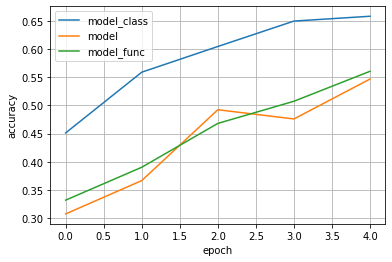

In [28]:
plt.plot(h_class,label = 'model_class')
plt.plot(h.history['val_accuracy'], label = 'model')
plt.plot(h_func.history['val_accuracy'], label = 'model_func')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Проверим пример

1/1 [==============================] - 0s 171ms/step


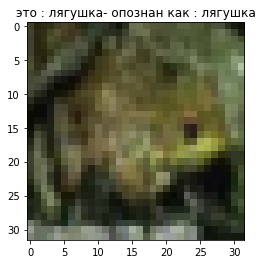

In [29]:
N = 107
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

## Практическое задание

### Задание 1.

- обучить сверточную нейронную сеть на датасете  cifar10 в одной из форм сборки и по вариантам определить следующие направления:
  
  1) оценить рост точности при увеличении ширины сети (больше/меньше ядер 3-4 варианта)
  
  2) оценить рост точности при увеличении глубины сети (больше/меньше слоев 3-4 варианта)
  
  3) провести обучение для 3-х одинаковых по схеме моделей на числе эпох до насыщения на валидационном наборе

  4) провести обучение с использованием других параметров оптимизатора и других оптимизаторов (3-4 модели)

  5) оценить качество обучения при уменьшении числа примеров для обучения (взять 1000, 5000, 10000, 25000) 

- сделать выводы по итогам (объединить результаты)


## Обучение эмбеддингов (Metric Learning)


Для решения задач, где мало экземпляров класса, но много кдассов можно использовать технику генерации модели (эмбединга), которая обучается максимизировать расстояние между объектами разных классов и минимизировать между объектами одного класса. Примерами такого обучения являются Сиамские сети с контрастивным обучением. 

Сама обучаемая модель представляет сверточную сеть, с векторным выходом (размер этого выхода == размеру эмбединга).Идея в том, что берем пары изображений, пропускаем через сеть и выходной вектор одного сравниваем с выходным вектором второго. Близкие изображения должны иметь близкие вектора эмюбедингов

Пример задачи , где актуально использовать такое обучение - распознавание лиц. Примеров каждого класса мало (десятки), а вот классов много (тысячи).

Сеть может быть построена алгоритмически (так будет у нас или физически иметь 2 входа и обучаться на их разделение или сближение). Основные идеи сиамской сети : https://habr.com/ru/company/vk/blog/468075/

Обучить сиамскую сеть для верификации лиц на датасете LFW.
Библиотеки: [Python, Tensorflow]. 

Подобные данные можно найти в нескольких известных наборах. Например, CelebA ( представляет собой крупномасштабный набор данных атрибутов лиц с более чем 200 тыс. изображений знаменитостей, каждое из которых имеет 40 аннотаций атрибутов. Изображения в этом наборе данных охватывают большие вариации поз и фоновые помехи. CelebA имеет большое разнообразие и богатые аннотации, в том числе - 10 177 идентификаторов, - 202 599 изображений лиц и - 5 мест ориентиров, 40 аннотаций двоичных атрибутов на изображение.)

Пример решения такой задачи для более простого набора данных в https://habr.com/ru/company/jetinfosystems/blog/465279/

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds # расширение для Тензорфлоу с официальными наборами данных https://www.tensorflow.org/datasets/catalog/overview#all_datasets

import imageio
from skimage.transform import resize

### Загрузка и подготовка датасета LFW https://www.tensorflow.org/datasets/catalog/lfw

Прочитаем данные из модуля расширения для Tensorflow tfds, который обеспечивает доступ к огромной коллекции датасетов для обучения нейронных сетей. Ниже описание датасета LFW, который содержит изображения людей (как правило только голова+плечи, но есть и чуть более полные изображения). Иногда на изображении может быть кто-то еще , кроме заявленой персоны. Часто видны руки и есть масса детелей перекрытия типа : очки, кепки и т.п. Состав данных :
   - изображения лиц размером (250, 250, 3)
   - класс объекта (имя)

   - 13 233 объектов
   - в каждом классе не более 10 изображений
 

In [35]:
if 1:
  (train_ds, test_ds), info_ds = tfds.load(
      'lfw',
      as_supervised=True,  # эти данные будут снабжены меткой-именем,т.е. предназначены для обучения с учителем
      with_info=True,  # с датасетами будет возвращаться информация о данных
      split=['train[:80%]', 'train[80%:]']
  ) # читаем данные в 2 датасета , разделив исходный набор в пропорции 80/20.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/13233 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/lfw/0.1.0.incompleteEHJPLQ/lfw-train.tfrecord*...:   0%|          | 0/13233 [0…

Dataset lfw downloaded and prepared to ~/tensorflow_datasets/lfw/0.1.0. Subsequent calls will reuse this data.


train_ds, test_ds - датасеты для тренировки и тестов.

Можно посмотреть информацию о данных.

In [36]:
info_ds

tfds.core.DatasetInfo(
    name='lfw',
    full_name='lfw/0.1.0',
    description="""
    Labeled Faces in the Wild:
            A Database for Studying Face Recognition in
            Unconstrained Environments
    """,
    homepage='http://vis-www.cs.umass.edu/lfw',
    data_path='~/tensorflow_datasets/lfw/0.1.0',
    file_format=tfrecord,
    download_size=172.20 MiB,
    dataset_size=180.28 MiB,
    features=FeaturesDict({
        'image': Image(shape=(250, 250, 3), dtype=tf.uint8),
        'label': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('label', 'image'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=13233, num_shards=2>,
    },
    citation="""@TechReport{LFWTech,
        author = {Gary B. Huang and Manu Ramesh and Tamara Berg and Erik Learned-Miller},
        title = {Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments},
        institution = {University of Massachusetts, Am

### Визуализация датасета LFW

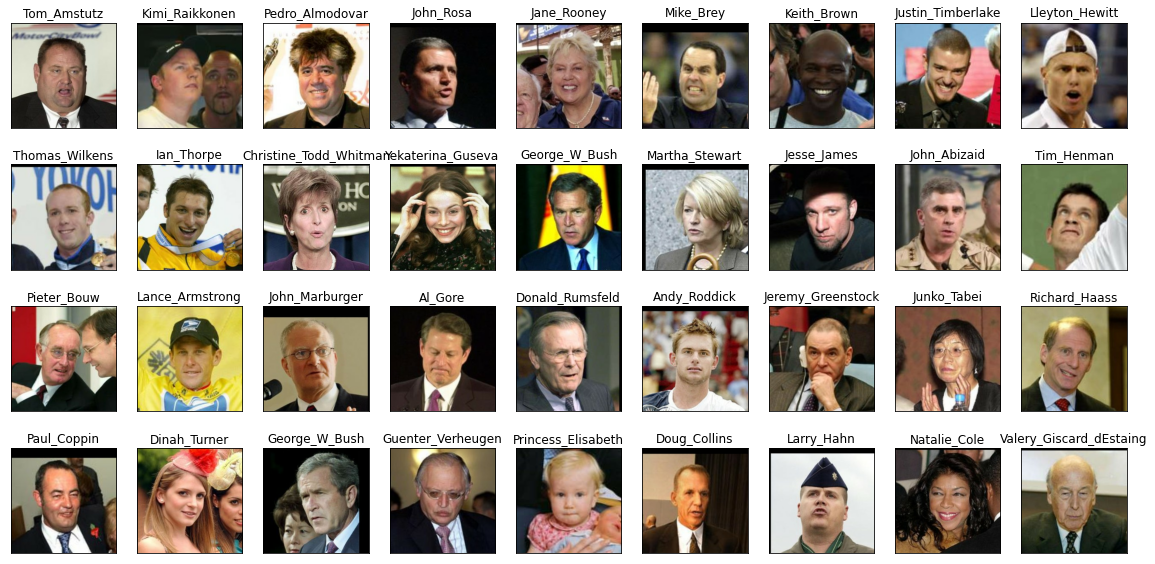

In [37]:
samples = [[x[0], x[1]] for x in iter(train_ds.take(36))]

fig = plt.figure(figsize=(20,10))

for i in range(len(samples)):
  ax = fig.add_subplot(4,9, i+1)
  ax.set_title(samples[i][0].numpy().decode('UTF-8'))
  ax.imshow(samples[i][1])
  plt.xticks([]), plt.yticks([])

plt.show()

### Создание модели CNN

Сеть состоит из слоев свертки, где строим признаки и слоев плотных, которые превратят исходные картинки в выходной вектор. На выходе сети вектор с линейной активацией слоя (т.е. выход может быть скольугодно большим по каждому элементу выходного вектора ). Нейроны выходного слоя работают как координаты непрерывного пространства (эмбединга) для входных картинок. каждое изображение превращаем в вектор эмбединга.

In [38]:
EMB_SIZE = 16 # размер эмбединга 

n = 4 # размерный фактор сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8 * n, (5, 5), padding='same', activation='relu',input_shape = (128,128,3)),
    tf.keras.layers.MaxPool2D((4, 4), (4, 4)),
    tf.keras.layers.Conv2D(16 * n, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((4, 4), (4, 4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8 * n, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(EMB_SIZE, activation=None),
])

### Contrastive Loss

Специальный тип функции потерь для решения задачи генерации наиболее эффективного эмбединга. Подобные результаты получают через несколько техник : триплетные потери (https://habr.com/ru/post/457928/), контрастивное обучение , консистентное обучение (https://habr.com/ru/post/670342/) и т.д.

Ниже реализация Контрастивных потерь

In [39]:
MARGIN = 10.0 #  размер отступа для контрастивных потерь

def contrastive_loss(embs, labels):
    bs = embs.shape[0]
    # приходящий в сеть пакет данных пропускаем в прямом направлении и получаем вектора эмбедингов
    embs1 = embs[:bs//2, :] # берем первую половину векторов
    embs2 = embs[bs//2:, :] # берем вторую половину векторов
    labels1 = labels[:bs//2] # берем метки первой половины векторов
    labels2 = labels[bs//2:] # берем метки второй половины векторов

    d2 = tf.reduce_sum(tf.square(embs1 - embs2), axis=1) # вычисляем рассояние между парами векторов из первой и второй половины пакета
    d = tf.sqrt(d2)
    z = tf.cast(labels1 == labels2, tf.float32) # определяем совпадение меток первой и второй половины пакета
    #  вычисляем контрастивные потери : раздвигаем объекты с разными метками и сдвигаем с одинаковыми
    return tf.reduce_mean(z * d2 + (1-z) * tf.maximum(0, MARGIN - d)**2)

### Подготовка пайплайна данных

In [40]:
def normal(label, image):
    return label, tf.cast(tf.image.resize(image,[128,128]), tf.float32) / 255.

In [41]:
BATCH_SIZE = 8 # размер пакета (чем больше, тем надежней обучение)
NUM_EPOCHS = 5 #  число эпох
#  строим датасет для работы с данными - будет формировать пакеты
train_ds = train_ds.map(normal)
#train_ds = train_ds.shuffle(buffer_size=11000)
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(BATCH_SIZE)

### Обучение модели

In [42]:
LEARNING_RATE = 0.001 # скорость обучения
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)
model.compile(loss = 'mse', optimizer=optimizer, metrics=['mse'])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dense_10 (Dense)            (None, 32)               

Циклы обучения модели по пакетам и эпохам в схеме Тензорфлоу обучения:

In [44]:
for iteration, (labels, images) in enumerate(train_ds):
    
    # Forward
    with tf.GradientTape() as tape:
        embs = model(images)# прямой проход
        loss_value = contrastive_loss(embs, labels)# потери
        
    # Backward
    grads = tape.gradient(loss_value, model.variables)# обратный шаг
    optimizer.apply_gradients(zip(grads, model.variables))# коррекция параметров

    if iteration % 100 == 0:
        print('[{}] Loss: {}'.format(iteration, loss_value.numpy()))

[0] Loss: 94.98641204833984
[100] Loss: 0.05494371056556702
[200] Loss: 0.021911129355430603
[300] Loss: 0.8562904000282288
[400] Loss: 0.3395918011665344
[500] Loss: 0.0
[600] Loss: 0.0
[700] Loss: 0.0
[800] Loss: 0.0
[900] Loss: 0.000352142087649554
[1000] Loss: 0.0
[1100] Loss: 0.0
[1200] Loss: 0.0
[1300] Loss: 10.831490516662598
[1400] Loss: 0.0
[1500] Loss: 0.0
[1600] Loss: 0.0
[1700] Loss: 2.603222608566284
[1800] Loss: 0.2248518466949463
[1900] Loss: 0.0
[2000] Loss: 5.542275905609131
[2100] Loss: 0.0
[2200] Loss: 0.0
[2300] Loss: 0.0
[2400] Loss: 0.0
[2500] Loss: 0.0
[2600] Loss: 0.0
[2700] Loss: 0.4205583930015564
[2800] Loss: 0.07151999324560165
[2900] Loss: 0.0
[3000] Loss: 0.0
[3100] Loss: 0.0
[3200] Loss: 0.0
[3300] Loss: 0.48541292548179626
[3400] Loss: 0.0
[3500] Loss: 1.3307076692581177
[3600] Loss: 0.0
[3700] Loss: 5.660416603088379
[3800] Loss: 0.0
[3900] Loss: 0.0
[4000] Loss: 0.0
[4100] Loss: 257.05303955078125
[4200] Loss: 0.41103604435920715
[4300] Loss: 0.0
[4400

## Тестирование на новых данных

Берем несколько картинок (2 принадлежат одному человеку, 3-я другой человек) и вычислим значение вектора эмбединга для этих изображений:

In [62]:
def draw_embeddings(X_embedded, targets, labels):
    plt.figure(figsize=(10, 10))
    for class_idx in range(np.max(targets)+1):
        X_embedded_class = X_embedded[targets == class_idx, :]
        plt.scatter(X_embedded_class[:,0], X_embedded_class[:,1])
    plt.legend(labels, loc='best')
    plt.grid(True)

Изображени (Виталий Соломин - Инокентий Смоктуновский):
- загружаем на диск
- нормализуем
- подаем в сеть

In [56]:
!wget https://s8.cdn.eg.ru/wp-content/uploads/2017/12/1wv7gx78023012-780x585.jpg
!wget https://alabanza.ru/wp-content/uploads/2018/02/Rost-ves-vozrast.-Gody-zhizni-Vitaliya-Solomina-foto.jpg
!wget https://img51994.domkino.tv/img/2017-04-24/fmt_97_24_71ad93a1bbb398ad3e8a55e4edff4680.jpg

--2022-12-01 18:49:00--  https://s8.cdn.eg.ru/wp-content/uploads/2017/12/1wv7gx78023012-780x585.jpg
Resolving s8.cdn.eg.ru (s8.cdn.eg.ru)... 135.181.170.67
Connecting to s8.cdn.eg.ru (s8.cdn.eg.ru)|135.181.170.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41336 (40K) [image/jpeg]
Saving to: ‘1wv7gx78023012-780x585.jpg.4’

1wv7gx78023012-780x 100%[===================>]  40.37K  --.-KB/s    in 0.06s   

2022-12-01 18:49:01 (702 KB/s) - ‘1wv7gx78023012-780x585.jpg.4’ saved [41336/41336]

--2022-12-01 18:49:01--  https://alabanza.ru/wp-content/uploads/2018/02/Rost-ves-vozrast.-Gody-zhizni-Vitaliya-Solomina-foto.jpg
Resolving alabanza.ru (alabanza.ru)... 45.130.41.13
Connecting to alabanza.ru (alabanza.ru)|45.130.41.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49956 (49K) [image/jpeg]
Saving to: ‘Rost-ves-vozrast.-Gody-zhizni-Vitaliya-Solomina-foto.jpg’

Rost-ves-vozrast.-G 100%[===================>]  48.79K  --.-KB/s    in 0.05

Запасные картинки

In [ ]:
!wget https://psj.ru/images/images/2020/04/01/801235587411.jpg
!wget https://www.vladtime.ru/uploads/posts/2017-12/1512580190_inx960x640-1.jpg
!wget https://uar.ru/upload/medialibrary/73a/SHA06426.jpg

--2022-12-01 13:27:28--  https://psj.ru/images/images/2020/04/01/801235587411.jpg
Resolving psj.ru (psj.ru)... 192.162.242.22
Connecting to psj.ru (psj.ru)|192.162.242.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276167 (270K) [image/jpeg]
Saving to: ‘801235587411.jpg’

801235587411.jpg    100%[===================>] 269.69K   536KB/s    in 0.5s    

2022-12-01 13:27:29 (536 KB/s) - ‘801235587411.jpg’ saved [276167/276167]

--2022-12-01 13:27:30--  https://www.vladtime.ru/uploads/posts/2017-12/1512580190_inx960x640-1.jpg
Resolving www.vladtime.ru (www.vladtime.ru)... 104.21.11.250, 172.67.150.207, 2606:4700:3033::ac43:96cf, ...
Connecting to www.vladtime.ru (www.vladtime.ru)|104.21.11.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124667 (122K) [image/jpeg]
Saving to: ‘1512580190_inx960x640-1.jpg’

1512580190_inx960x6 100%[===================>] 121.75K   732KB/s    in 0.2s    

2022-12-01 13:27:31 (732 KB/s) - ‘1512580190_in

Чтение картинки и Нормализация:

In [46]:
def load_and_prepare_image(fpath):
    img = imageio.imread(fpath, pilmode="RGB")
    img = img.astype(np.float32)/255
    img = resize(img, (128, 128, 3), mode='reflect', anti_aliasing=True)
    img = np.reshape(img, (128, 128, 3))
    return img

In [57]:
img_a1 = load_and_prepare_image('1wv7gx78023012-780x585.jpg') 
img_a2 = load_and_prepare_image('Rost-ves-vozrast.-Gody-zhizni-Vitaliya-Solomina-foto.jpg') 
img_b1 = load_and_prepare_image('fmt_97_24_71ad93a1bbb398ad3e8a55e4edff4680.jpg') 

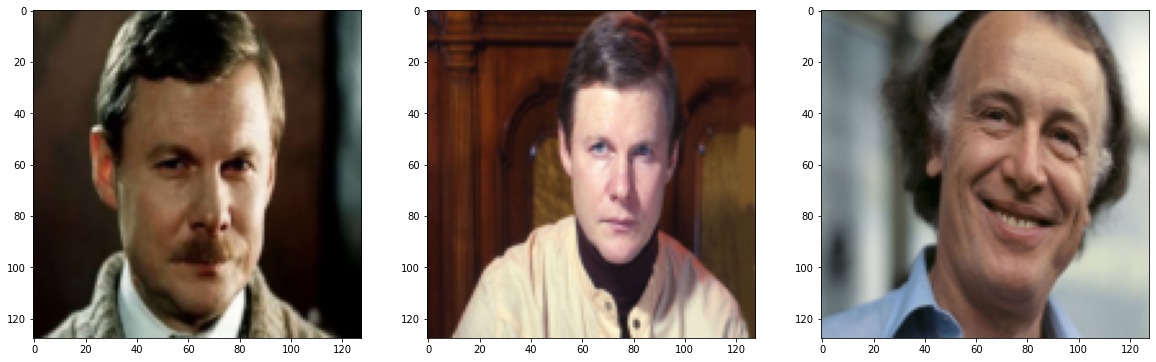

In [58]:
fig = plt.figure(figsize=[20,10])
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img_a1)

ax = fig.add_subplot(1, 3, 2)
ax.imshow(img_a2)

ax = fig.add_subplot(1, 3, 3)
ax.imshow(img_b1);

In [59]:
test = np.stack((img_a1, img_a2, img_b1), axis=0)
test.shape

(3, 128, 128, 3)

In [60]:
new_embs = model(test)

In [61]:
def diff(e1, e2):
    return np.sum((e1 - e2)**2) ** 0.5

emb1 = new_embs[0,:]
emb2 = new_embs[1,:]
emb3 = new_embs[2,:]

print('A1 <-> A2: ', diff(emb1, emb2))
print('A2 <-> B1: ', diff(emb2, emb3))
print('A1 <-> B1: ', diff(emb1, emb3))

A1 <-> A2:  10.660680839739875
A2 <-> B1:  16.04494553121354
A1 <-> B1:  18.769333294351537


**Вывод**

Сеть с задачей эммбендинга справилась, но результат в случае A1 <-> A2 имеет достаточно большое расстояние хотя это фотографии одного и того же человека. Но при этом расстояние между разными людьми в 1.5 раза больше.


Задание 2

- изменить параметры модели и построить новую версию сети по вариантам:

  1) изменять EMB_SIZE = 16 (2, 4, 8, 32, 64 и т.д. пока хватает памяти)

  2) изменить MARGIN = 10.0 (от 1 до 100 4-5 вариантов)

  3) изменить размер сети по числу слоев (сделать 4-5 вариантов добавляя число сверточных слоев (делаем стеки сверток))

  4) изменить размер слоев (n - базовое число нейронов в слое - пропорционально - делаем слои шире и уже)
  
  5) Изменить параметры обучения : скорость обучения, тип оптимизатора (4-5 вариантов )

- Оценить среднее рассояние между 10-ю картинками для 5 классов (сделать по 2 фотографии каждого класса - найти в интернете или сфотографировать на месте). Определить М1 среднее расстояние между изображениями одного класса. Определить М2 среднее расстояние между  5-ю парами объектов из разных классов. Определить относительное расстояние в текущей модели их по всем вариантам М1отн = 2 * М1 /(М1+М2), М2отн = 2 * М2/(М1+М2)
- сравнить результаты для всех вариантов и сделать выводы

Вопрос:

1. есть сверточный слой с ядром (2,2), ядер в слое 16, padding = 'valid', на вход приходит тензор (10,100,100, 4) , что будет на выходе (размер выходного тензора)

2. есть слой MaxPooling2D с ядром (2,2),  padding = 'valid', на вход приходит тензор (10,100,100, 4) , что будет на выходе (размер выходного тензора)

3. есть сверточный слой с ядром (3,3), ядер в слое 16, padding = 'same', на вход приходит тензор (10,100,100, 4) , что будет на выходе (размер выходного тензора)

4. есть сверточный слой с ядром (3,3), ядер в слое 16, padding = 'valid', на вход приходит тензор (10,100,100, 4) , сколько параметров настраиваем

5. есть слой MaxPooling2D с ядром (2,2),padding = 'valid', на вход приходит тензор (10,100,100, 4) , сколько параметров настраиваем